**`EDA: Análisis Exploratorio de los Datos`**

In [76]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest,chi2

Dataset : hospitalizaciones_test.csv

In [77]:
#Ingesta de archivo csv:
df=pd.read_csv("hospitalizaciones_train.csv")

In [78]:
#Creamos la columna estadia. 
# Si Stay(in days) <= 8 la estadía es corta (denotado por 0)
#Si Stay(in days) > 8 la estadía es prolongada (danotado por 1)

estadia=[]
for i in df["Stay (in days)"]:
    if i > 8:
        estadia.append(1)
    elif i <= 8:
        estadia.append(0)


In [79]:
estadia=pd.DataFrame({"estadia":estadia})

In [80]:
estadia.value_counts()

estadia
1          255416
0          154584
dtype: int64

In [81]:
df=pd.concat([df,estadia], axis=1)

In [82]:
df_train=df.drop(["Stay (in days)"], axis=1)

In [83]:
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estadia
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,1


In [84]:
print('Cantidad de Filas y columnas:',df_train.shape)
print('Nombre columnas:',df_train.columns)

Cantidad de Filas y columnas: (410000, 15)
Nombre columnas: Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit', 'estadia'],
      dtype='object')


In [85]:
#Columnas, nulos y tipo de datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [86]:
#Descripción estadística de los datos numéricos
df_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,estadia
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,0.622966
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,0.484644
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,0.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,0.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,1.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,1.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,1.000000


**`Preprocesamiento de datos`**

Categorizamos las variables

In [87]:
le = preprocessing.LabelEncoder()

le.fit(df_train.Department)
df_train.Department = le.transform(df_train.Department)

le.fit(df_train.Ward_Facility_Code)
df_train.Ward_Facility_Code = le.transform(df_train.Ward_Facility_Code)

le.fit(df_train.doctor_name)
df_train.doctor_name = le.transform(df_train.doctor_name)

le.fit(df_train.Age)
df_train.Age = le.transform(df_train.Age)

le.fit(df_train.gender)
df_train.gender = le.transform(df_train.gender)

le.fit(df_train['Type of Admission'])
df_train['Type of Admission'] = le.transform(df_train['Type of Admission'])

le.fit(df_train['Severity of Illness'])
df_train['Severity of Illness'] = le.transform(df_train['Severity of Illness'])

le.fit(df_train.health_conditions)
df_train.health_conditions = le.transform(df_train.health_conditions)

le.fit(df_train.Insurance)
df_train.Insurance = le.transform(df_train.Insurance)

In [88]:
df_train

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estadia
0,4,2,3,8,0,33070,4,0,1,0,1,4,1,2966.408696,0
1,4,2,1,8,2,34808,3,0,1,1,2,2,0,3554.835677,1
2,2,2,1,8,8,44577,2,0,1,0,1,2,1,5624.733654,0
3,4,2,3,4,7,3695,3,0,2,2,4,4,0,4814.149231,0
4,2,1,4,2,10,108956,7,1,1,2,1,2,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,3,6,1,63105,3,0,1,1,0,3,1,3902.291076,0
409996,5,2,3,3,5,129292,2,0,1,0,5,4,0,4771.995223,1
409997,4,2,3,6,9,11399,2,0,0,1,0,4,1,3816.994210,1
409998,10,2,3,4,10,75003,2,0,1,2,5,2,1,3841.577491,1


Proceso de selección de features.
Observación:utilizaremos el modelo SelectKBest con el método chi2

In [89]:
df_train[df_train["patientid"]<0]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estadia
2238,1,2,3,6,0,-914,1,0,1,2,3,6,1,6778.130714,0
2977,2,1,0,2,6,-842,5,1,1,2,4,2,1,4814.433104,1
4037,4,1,0,2,2,-1046,2,1,1,0,2,4,1,4440.225183,1
5354,3,2,5,8,9,-928,3,0,1,2,2,3,1,8376.323315,0
5682,2,2,3,3,8,-61,4,0,0,1,4,4,1,4798.440801,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406347,4,2,3,8,5,-51,3,0,1,2,2,2,1,2596.319972,1
406928,5,2,3,4,1,-259,3,0,1,2,4,9,1,9190.467634,1
407258,4,1,2,2,0,-319,3,1,0,1,4,2,0,3620.858853,1
407663,3,2,3,6,2,-845,1,0,1,2,0,2,0,4889.302585,0


In [90]:
#Cambiamos los valores negativos de la columna patientid ya que no parece lógico que el identificador del paciente sea menor a cero.
df_train["patientid"]=list(map(lambda x: abs(x),df_train["patientid"]))

In [91]:
df_train[df_train["patientid"]<0]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,estadia


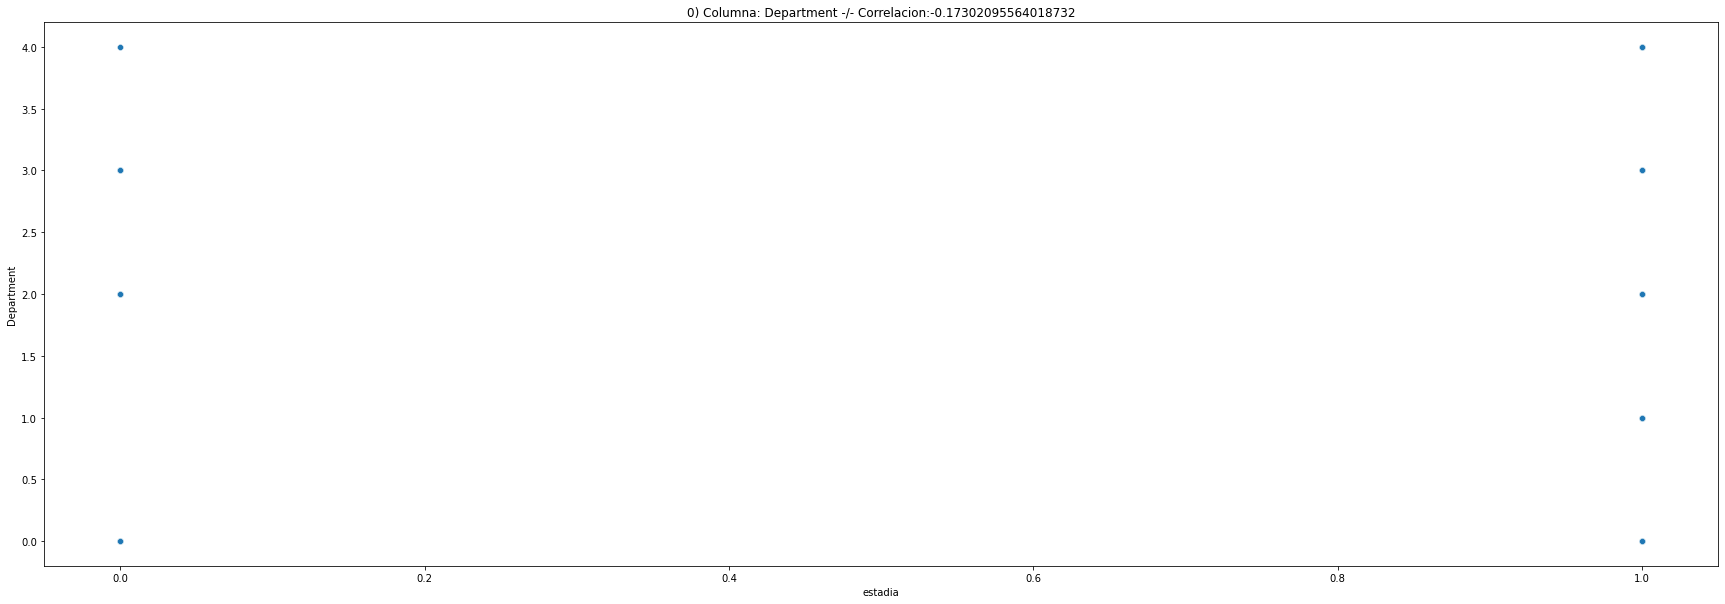

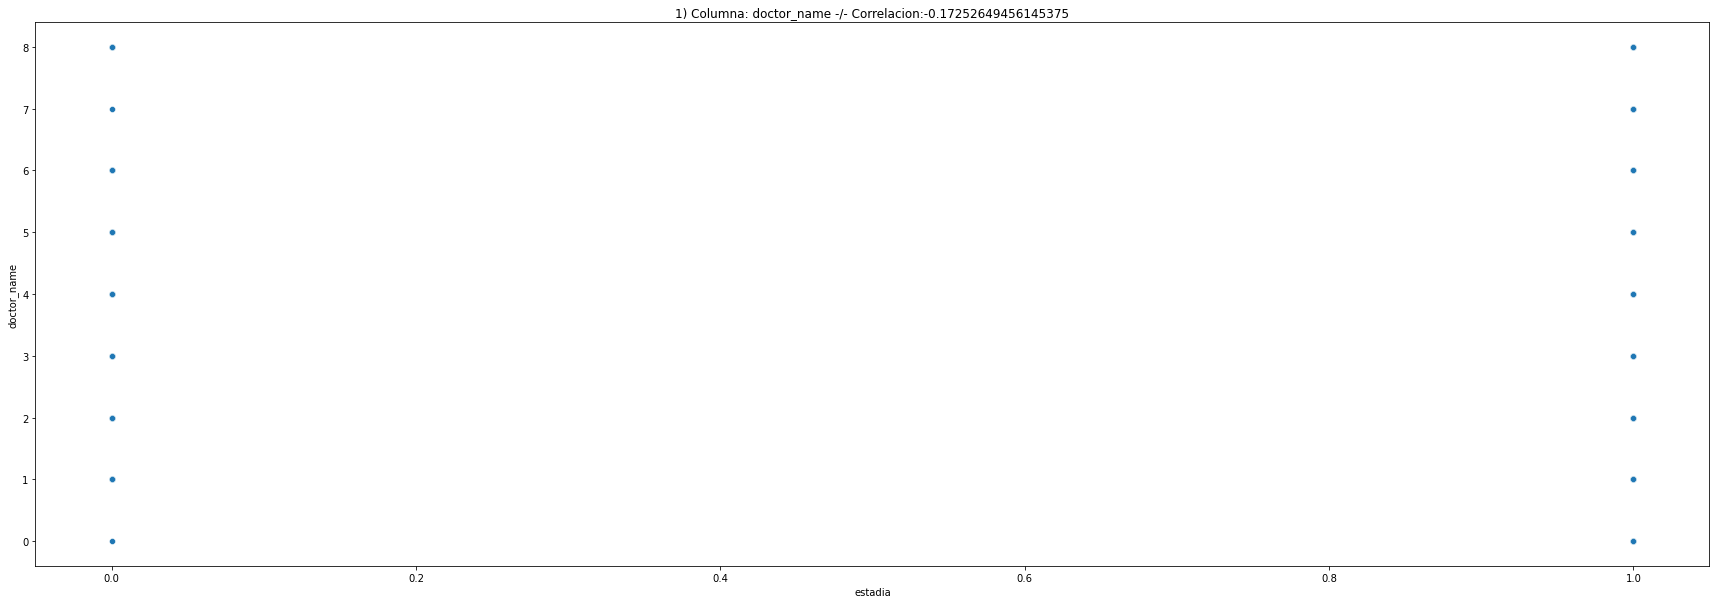

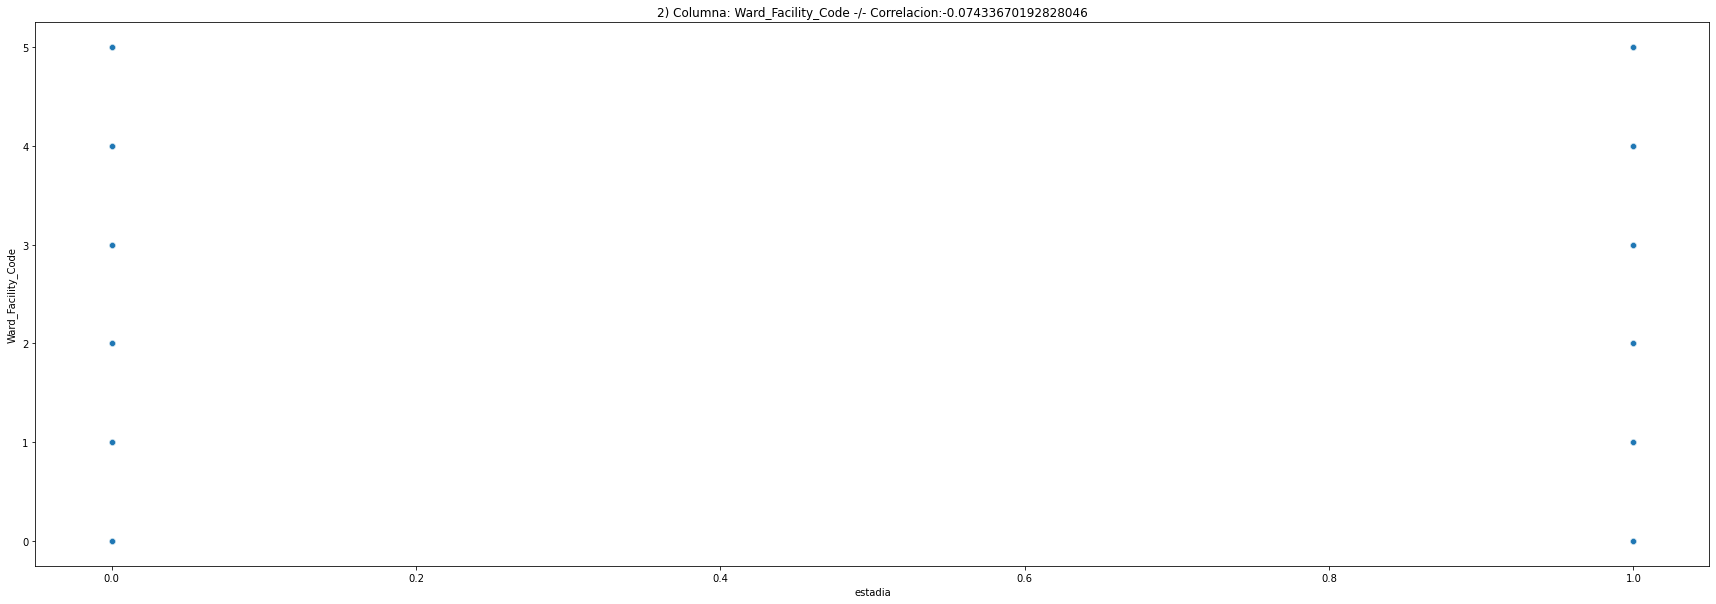

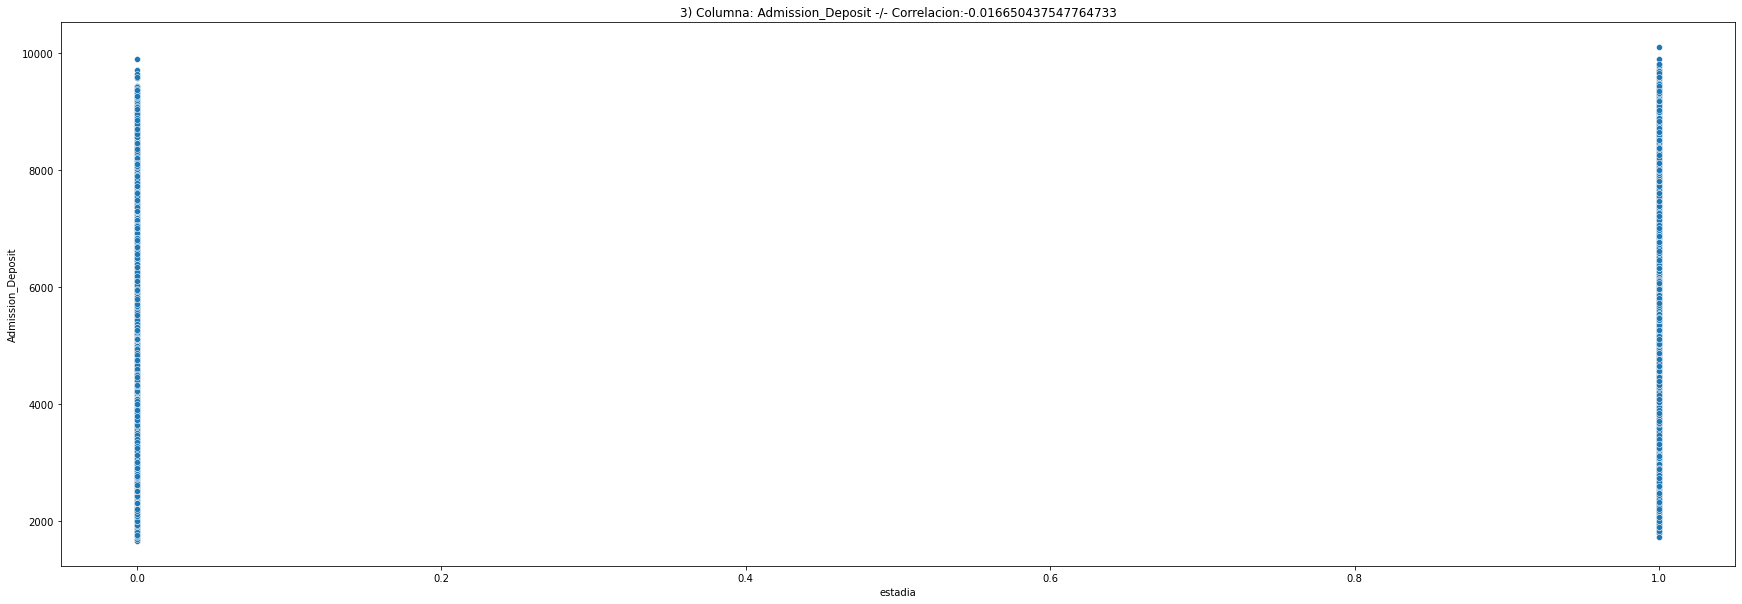

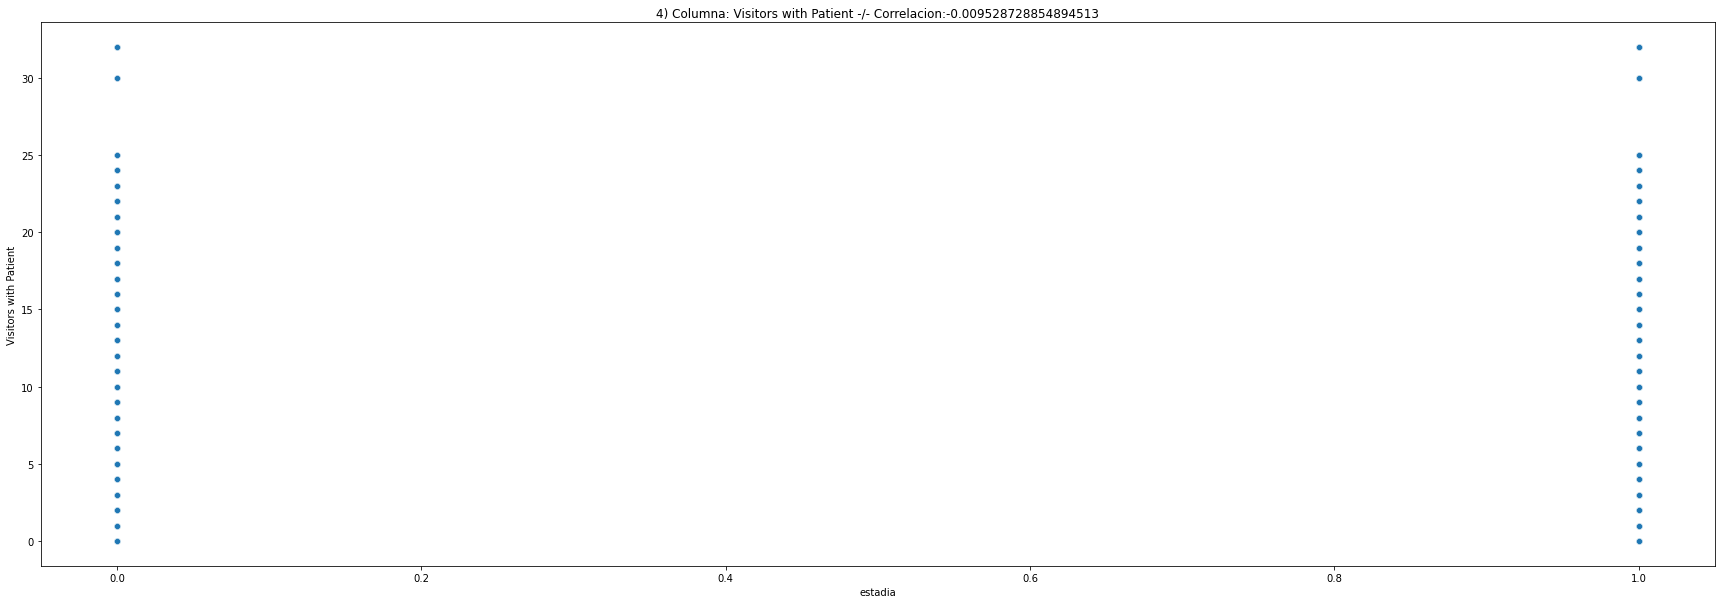

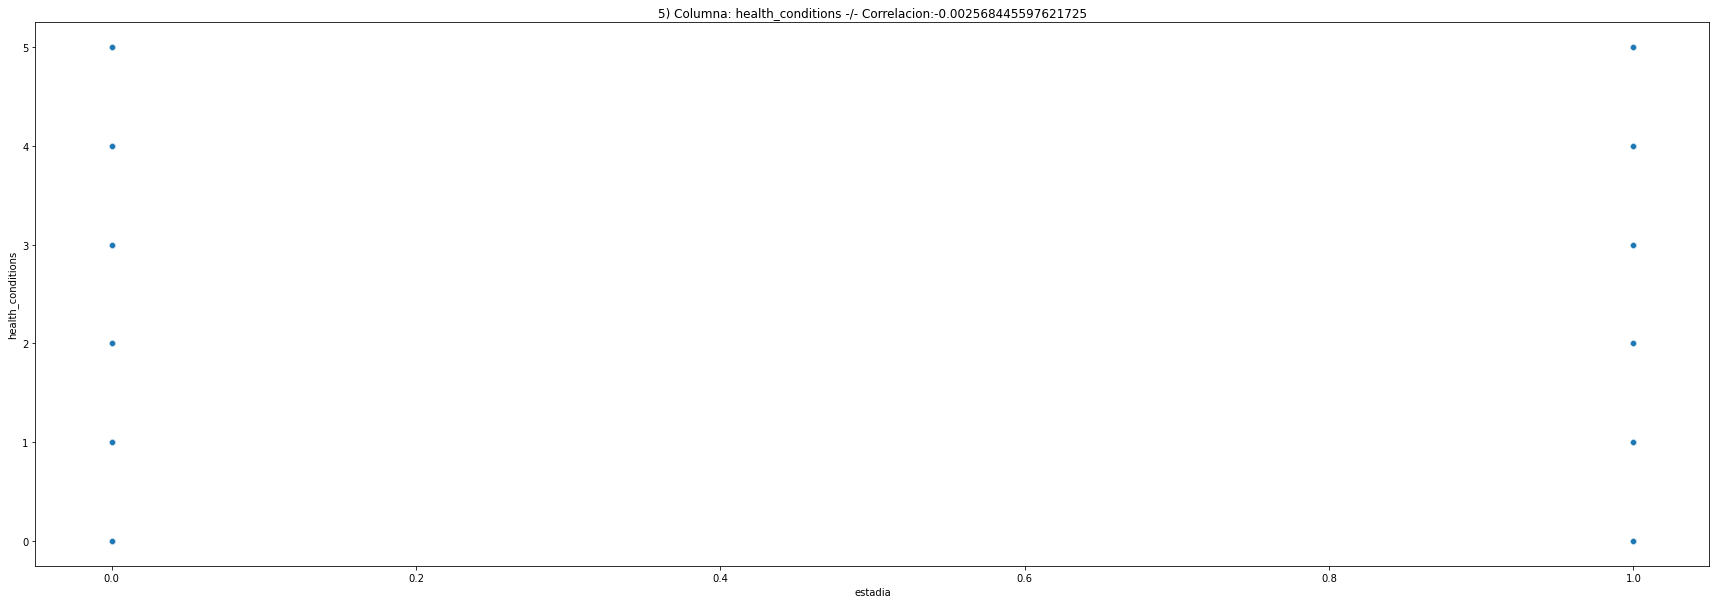

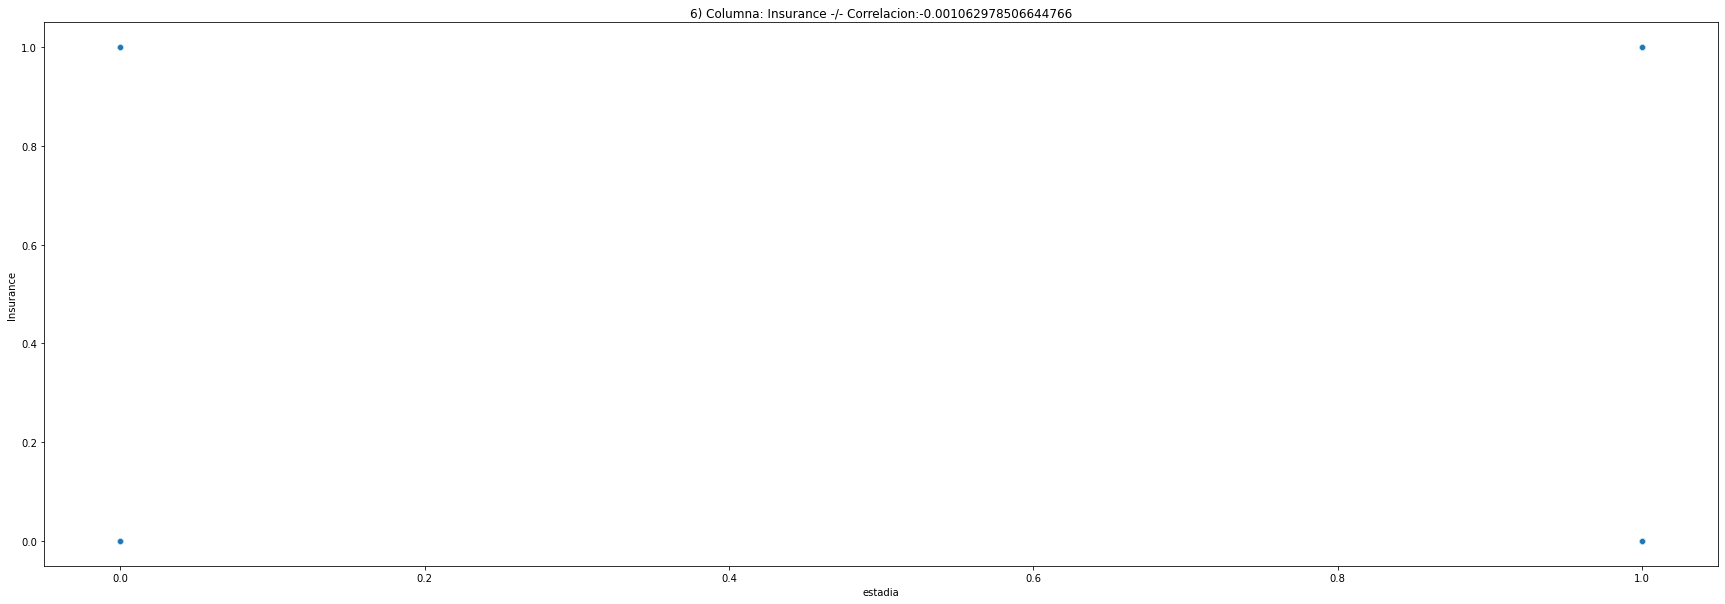

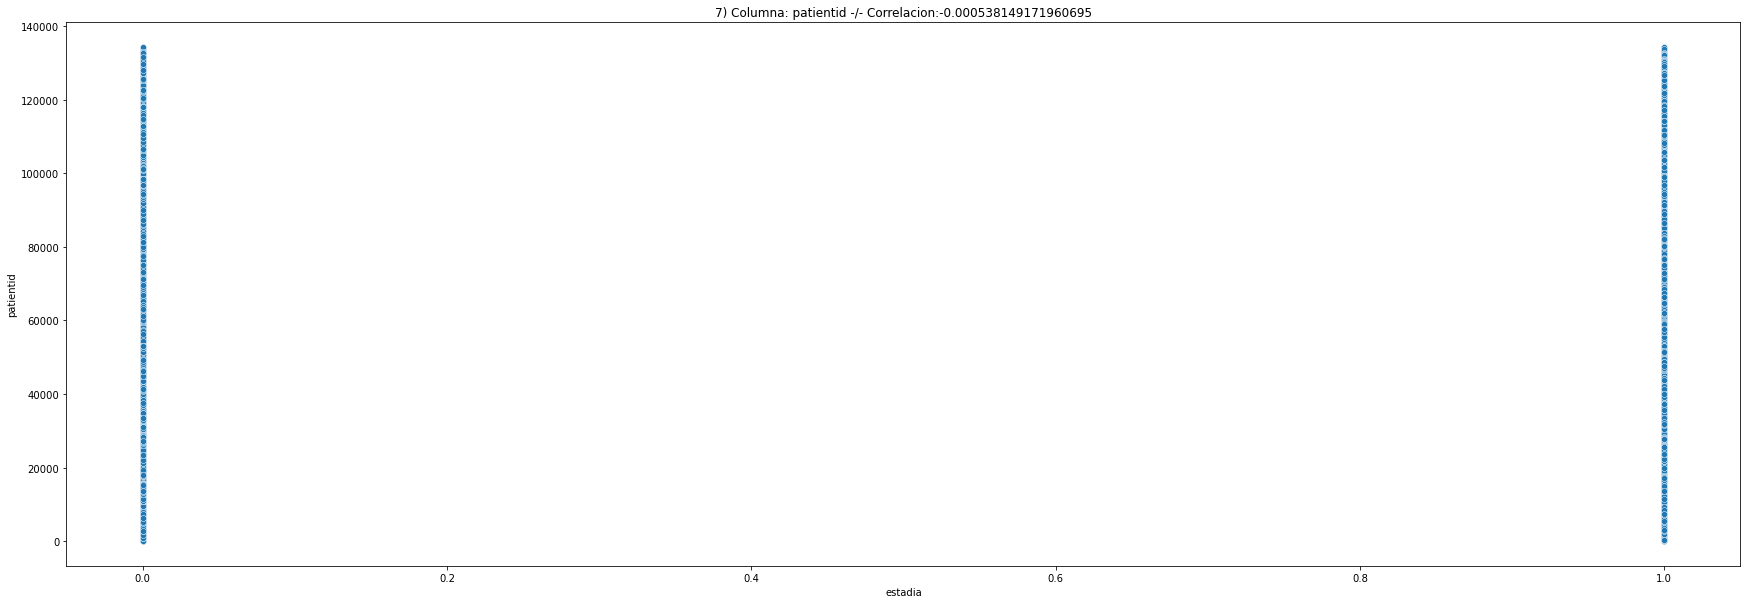

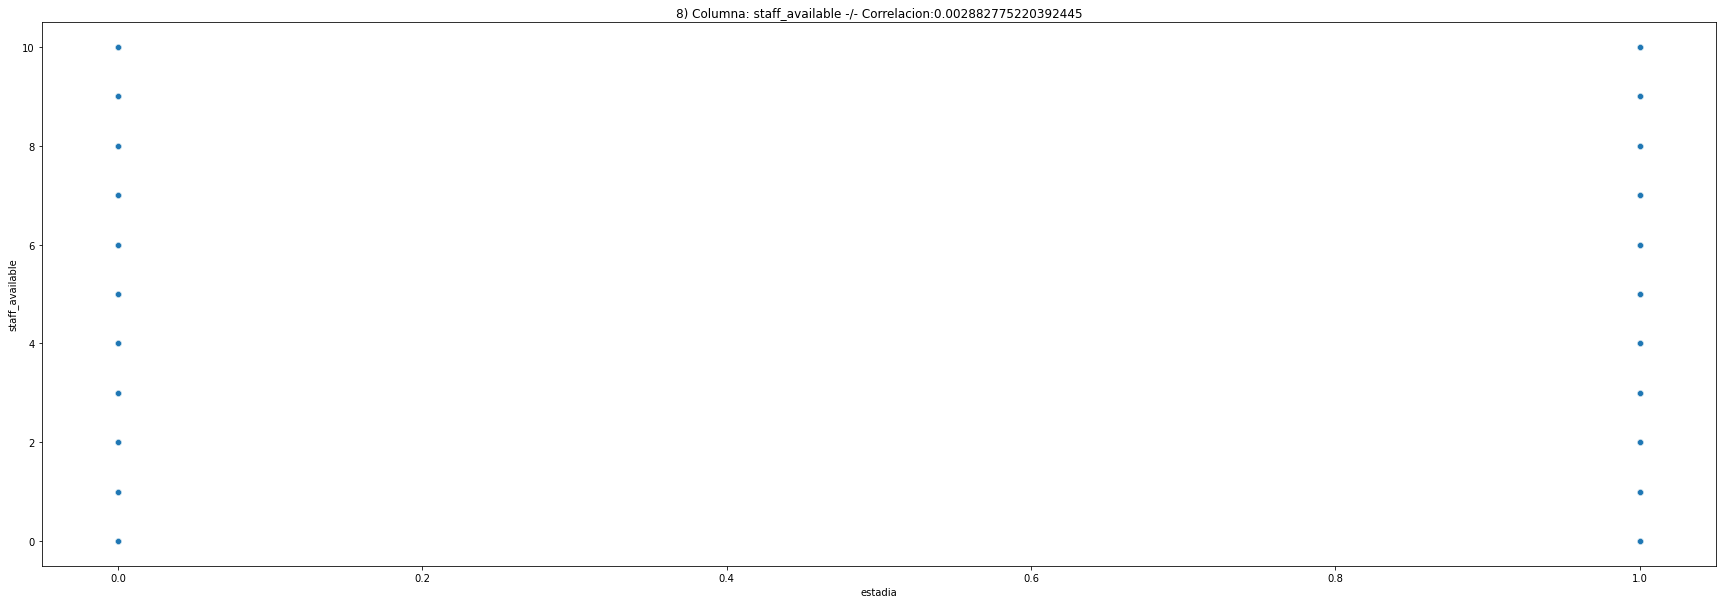

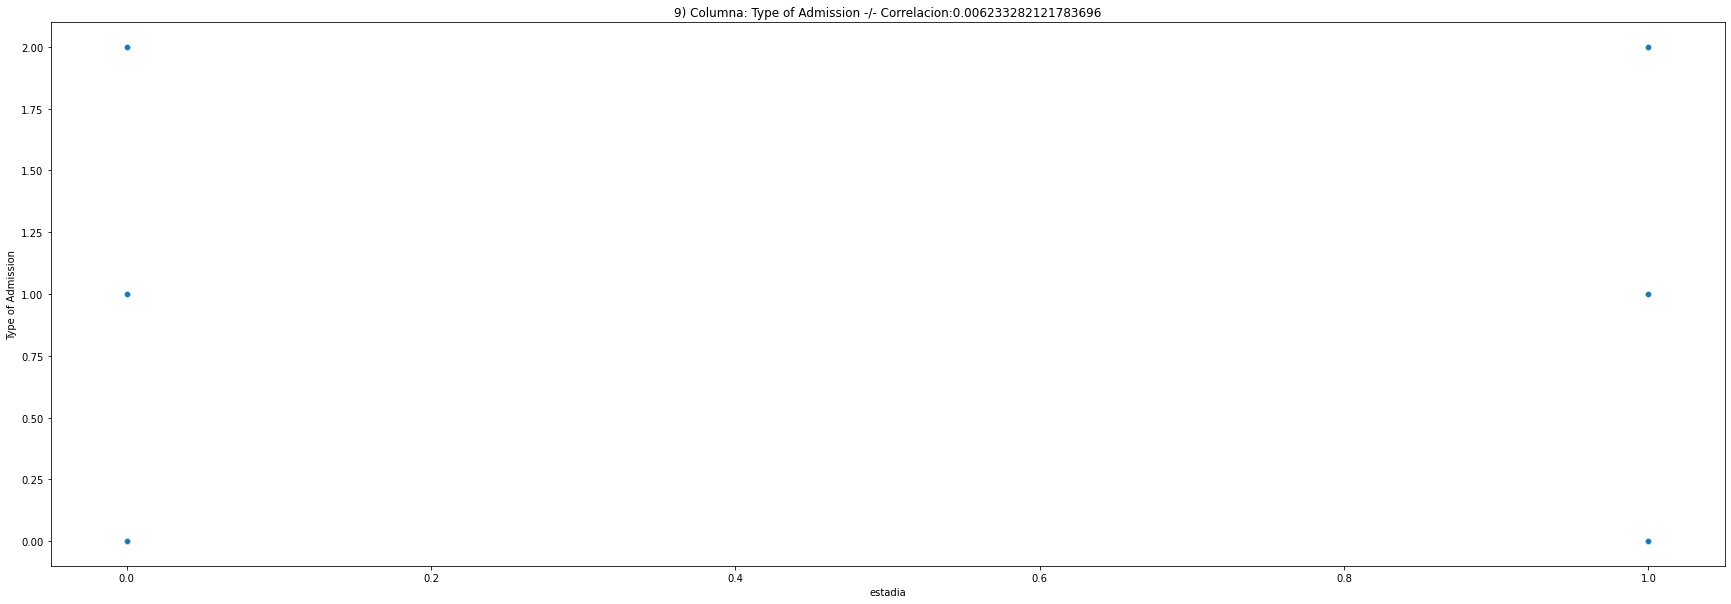

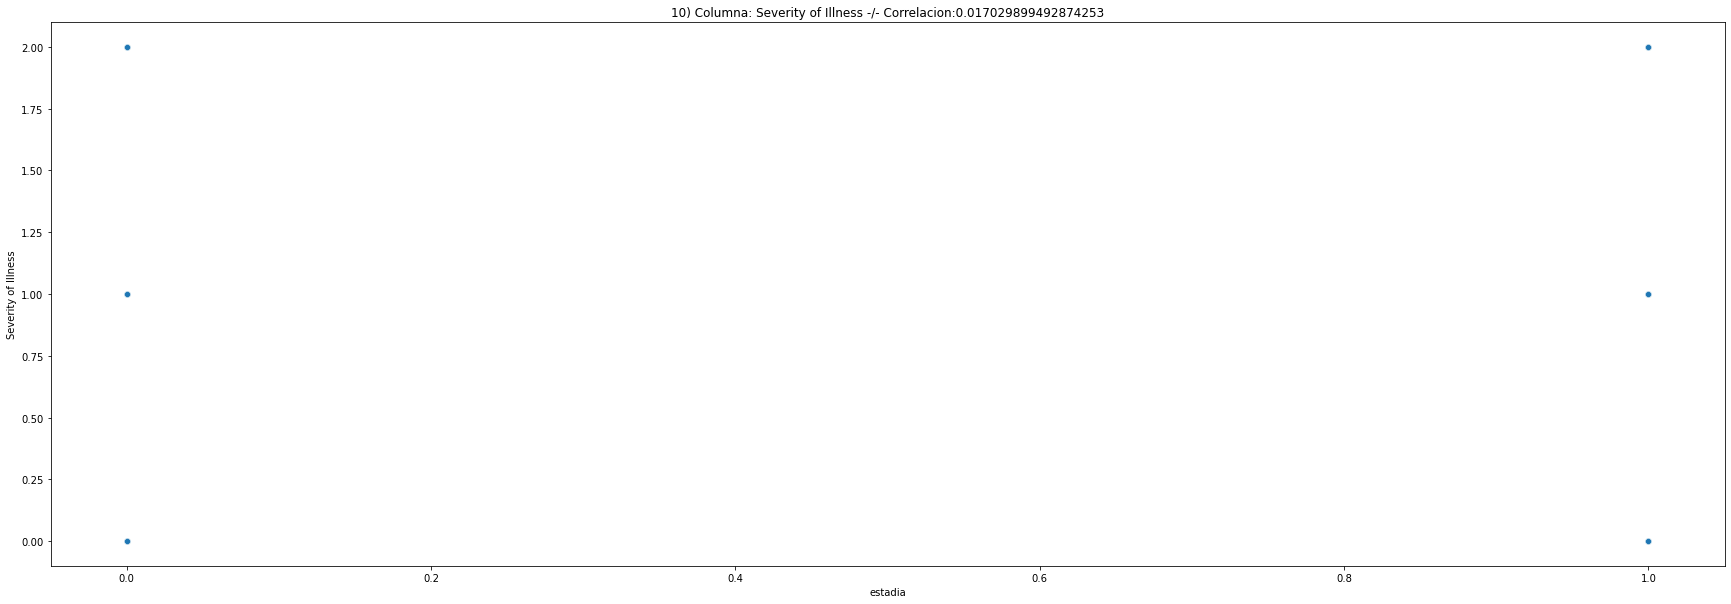

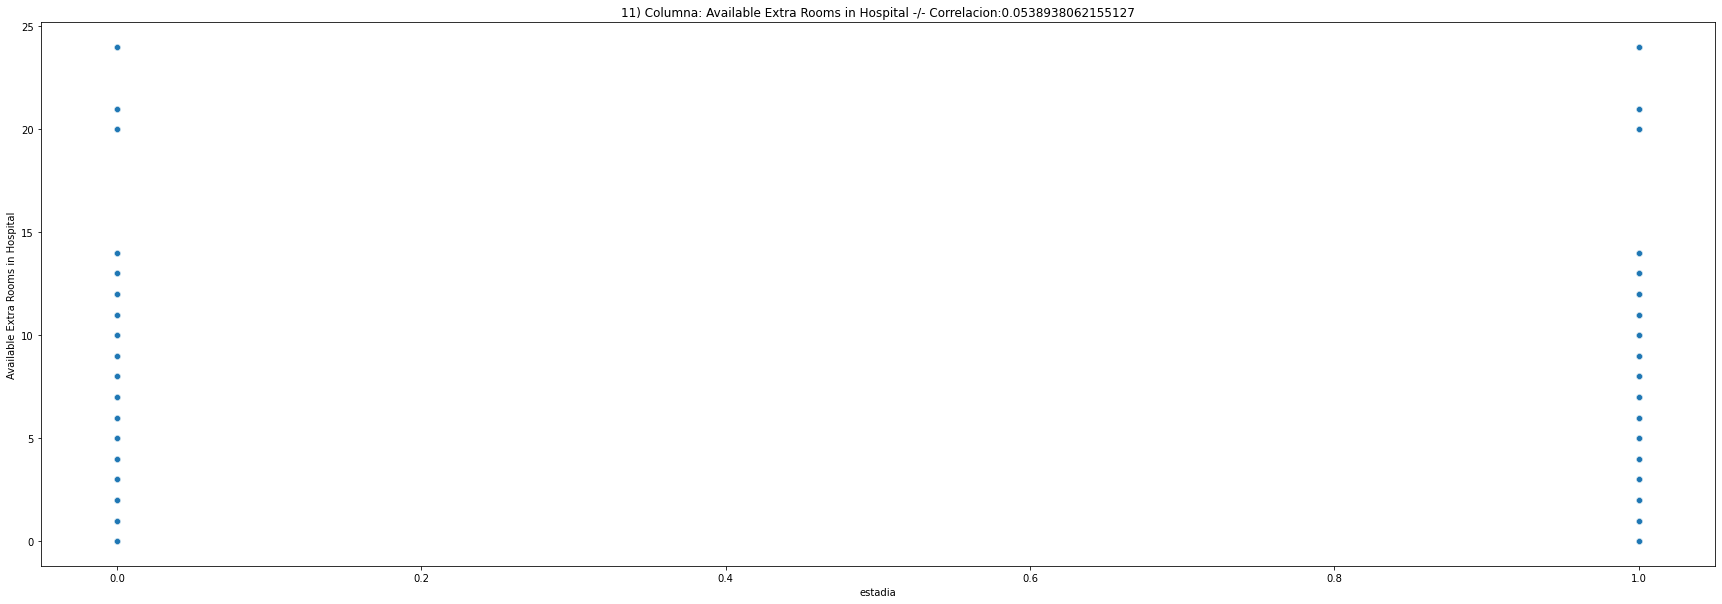

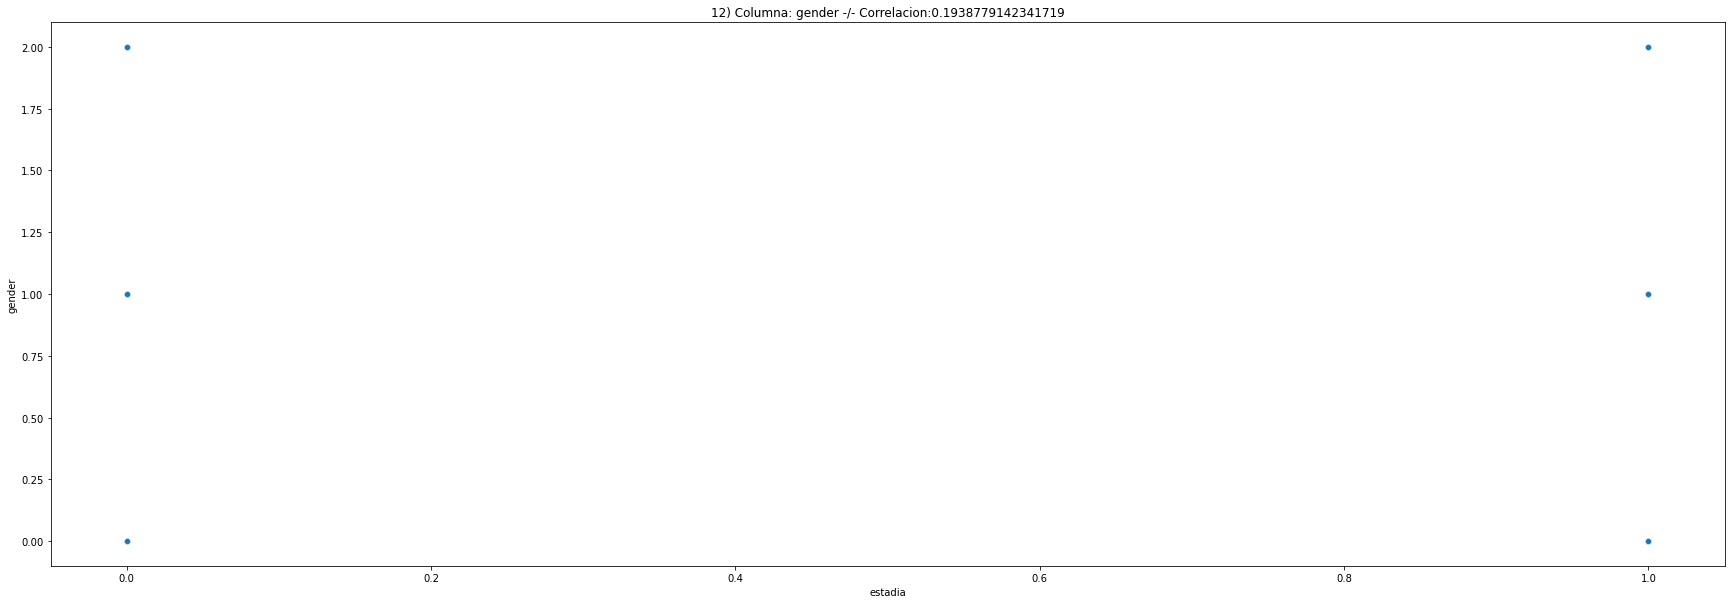

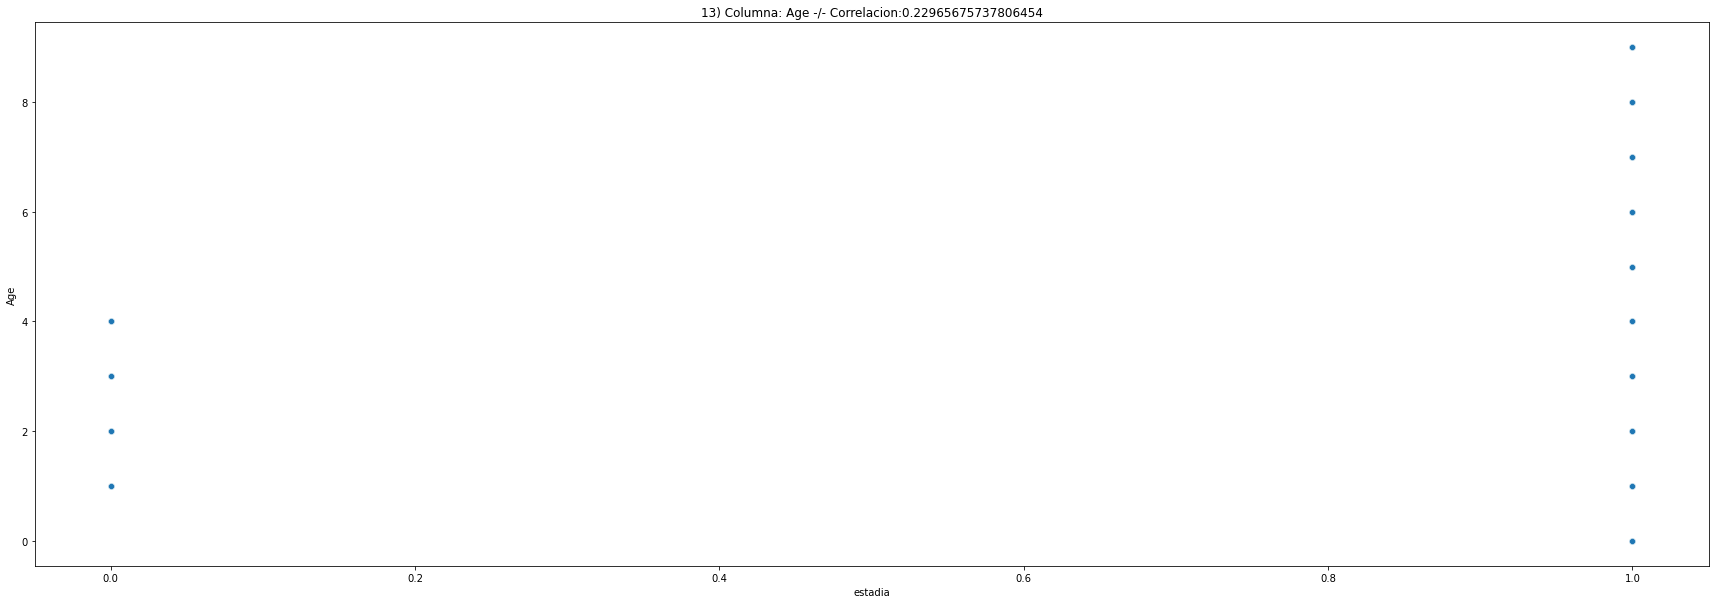

In [92]:
df_corr=df_train.corr()
cols = df_corr.loc['estadia'].sort_values(ascending=True).index
vals = df_corr.loc['estadia'].sort_values(ascending=True).values

tam = len(vals)
i = 0
while i < tam:
    if not (vals[i] is None) and (cols[i] != 'estadia'):
        ax = plt.axes()
        sns.scatterplot(x="estadia", y=cols[i], data=df_train[['estadia',cols[i]]])
        titulo = str(i) + ") Columna: " + str(cols[i]) + " -/- Correlacion:" + str(vals[i])
        ax.set_title(titulo)
        plt.show()
    i+=1

In [126]:
X=df_train.drop(columns= ["estadia"])
y=df_train["estadia"]

In [127]:
selector = SelectKBest(chi2,k=3)

In [128]:
z = selector.fit_transform(X,y)

In [129]:
scores = selector.scores_

In [130]:
list(X.columns)

['Available Extra Rooms in Hospital',
 'Department',
 'Ward_Facility_Code',
 'doctor_name',
 'staff_available',
 'patientid',
 'Age',
 'gender',
 'Type of Admission',
 'Severity of Illness',
 'health_conditions',
 'Visitors with Patient',
 'Insurance',
 'Admission_Deposit']

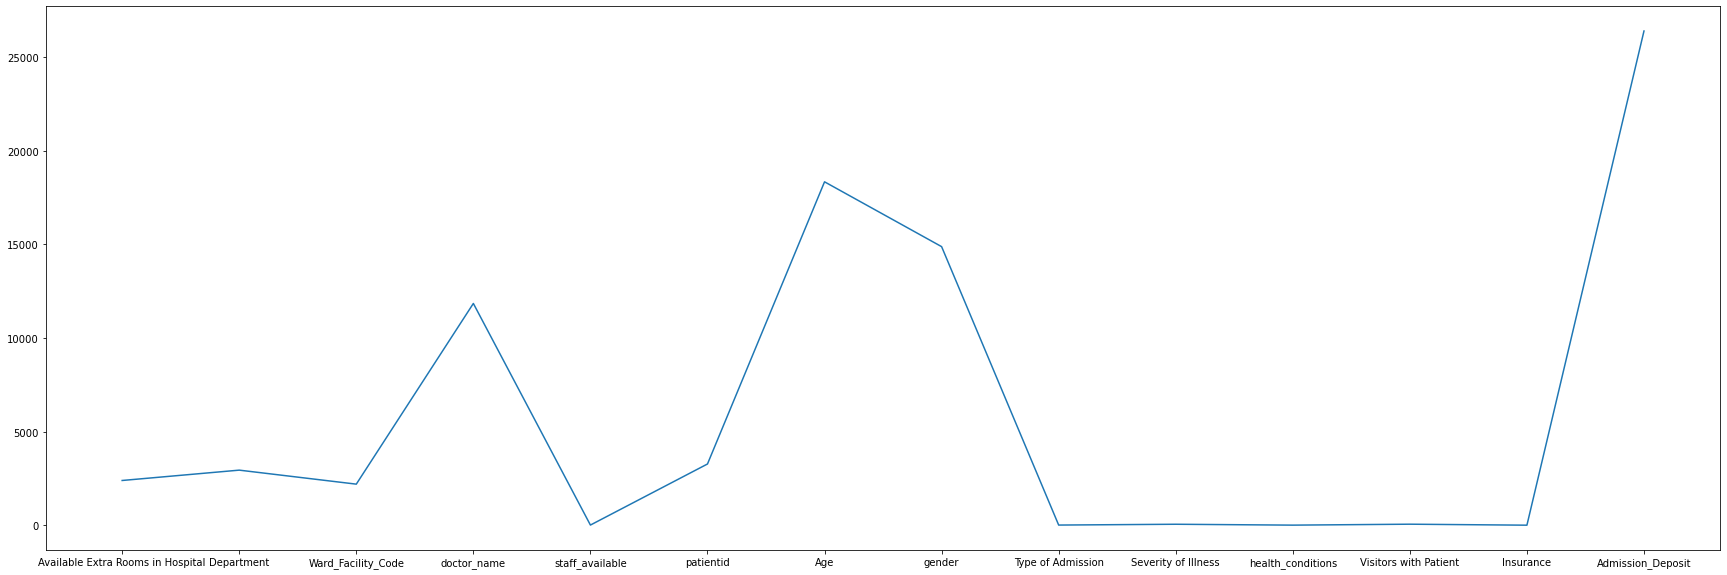

In [131]:
plt.rcParams["figure.figsize"] = [30,10]
plt.plot(scores)
plt.xticks(np.arange(14),list(X.columns));

In [132]:
filter = selector.get_support()
features = np.array(X.columns)
 
print("All features:")
print(features)
 
print("Selected best 3:")
print(features[filter])
print(z) 


All features:
['Available Extra Rooms in Hospital' 'Department' 'Ward_Facility_Code'
 'doctor_name' 'staff_available' 'patientid' 'Age' 'gender'
 'Type of Admission' 'Severity of Illness' 'health_conditions'
 'Visitors with Patient' 'Insurance' 'Admission_Deposit']
Selected best 3:
['Age' 'gender' 'Admission_Deposit']
[[4.00000000e+00 0.00000000e+00 2.96640870e+03]
 [3.00000000e+00 0.00000000e+00 3.55483568e+03]
 [2.00000000e+00 0.00000000e+00 5.62473365e+03]
 ...
 [2.00000000e+00 0.00000000e+00 3.81699421e+03]
 [2.00000000e+00 0.00000000e+00 3.84157749e+03]
 [4.00000000e+00 0.00000000e+00 4.32904641e+03]]


*Del análisis anterior e obtiene que los features que utilizaremos son: ['Age' 'gender' 'Admission_Deposit']*

Si bien en el análisis anterior se detectan las columnas 'Age','Admission_Deposit' , considero conveniente utilizar también las columnas 'Type of Admission', 'Severity of Illness', 'health_conditions' , ya que si bien presentan correlaciones menores, en la realidad podrían ser factores que contribuyan a la decisión de la cantidad días que será internado el paciente y por tanto su estadía sea prolongada o no.

In [233]:
df_entrenamiento=df_train[['Age', 'gender','Type of Admission', 'Severity of Illness', 'health_conditions','Admission_Deposit']]

In [234]:
df_entrenamiento

,Age,gender,Type of Admission,Severity of Illness,health_conditions,Admission_Deposit
0,4,0,1,0,1,2966.408696
1,3,0,1,1,2,3554.835677
2,2,0,1,0,1,5624.733654
3,3,0,2,2,4,4814.149231
4,7,1,1,2,1,5169.269637
...,...,...,...,...,...,...
409995,3,0,1,1,0,3902.291076
409996,2,0,1,0,5,4771.995223
409997,2,0,0,1,0,3816.994210
409998,2,0,1,2,5,3841.577491


In [235]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  410000 non-null  int32  
 1   gender               410000 non-null  int32  
 2   Type of Admission    410000 non-null  int32  
 3   Severity of Illness  410000 non-null  int32  
 4   health_conditions    410000 non-null  int32  
 5   Admission_Deposit    410000 non-null  float64
dtypes: float64(1), int32(5)
memory usage: 10.9 MB


Dataset : "hospitalizaciones_test.csv"

In [236]:
#Ingesta de archivo csv:
df_test=pd.read_csv("hospitalizaciones_test.csv")

In [237]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Available Extra Rooms in Hospital  90000 non-null  int64  
 1   Department                         90000 non-null  object 
 2   Ward_Facility_Code                 90000 non-null  object 
 3   doctor_name                        90000 non-null  object 
 4   staff_available                    90000 non-null  int64  
 5   patientid                          90000 non-null  int64  
 6   Age                                90000 non-null  object 
 7   gender                             90000 non-null  object 
 8   Type of Admission                  90000 non-null  object 
 9   Severity of Illness                90000 non-null  object 
 10  health_conditions                  90000 non-null  object 
 11  Visitors with Patient              90000 non-null  int

In [238]:
le = preprocessing.LabelEncoder()

le.fit(df_test.Department)
df_test.Department = le.transform(df_test.Department)

le.fit(df_test.Ward_Facility_Code)
df_test.Ward_Facility_Code = le.transform(df_test.Ward_Facility_Code)

le.fit(df_test.doctor_name)
df_test.doctor_name = le.transform(df_test.doctor_name)

le.fit(df_test.Age)
df_test.Age = le.transform(df_test.Age)

le.fit(df_test.gender)
df_test.gender = le.transform(df_test.gender)

le.fit(df_test['Type of Admission'])
df_test['Type of Admission'] = le.transform(df_test['Type of Admission'])

le.fit(df_test['Severity of Illness'])
df_test['Severity of Illness'] = le.transform(df_test['Severity of Illness'])

le.fit(df_test.health_conditions)
df_test.health_conditions = le.transform(df_test.health_conditions)

le.fit(df_test.Insurance)
df_test.Insurance = le.transform(df_test.Insurance)

In [239]:
df_evaluacion=df_test[[ 'Age', 'gender','Type of Admission', 'Severity of Illness', 'health_conditions','Admission_Deposit']]

**`División de dataset en train y test utilizando train_test_split`**

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X=df_entrenamiento
y=df_train["estadia"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

**`Pipeline`**

In [242]:
# Importamos las librerías necesarias

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [243]:
# Creamos el primer pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

In [244]:
# Creamos el segundo pipeline

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [245]:
# Los guardamos en una lista

pipelines = [pipe_lr, pipe_dt]

In [246]:
# Entrenamos

for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [247]:
#Predicciones
y_pred_lr=pipe_lr.predict(X_test)
y_pred_dt=pipe_dt.predict(X_test)


In [248]:
#Evaluamos
print(f'El accuracy del modelo de regresión logística es: {accuracy_score(y_test,y_pred_lr)}')
print(f'El recall del modelo de regresión logística es: {recall_score(y_test,y_pred_lr)}')
print()
print(f'El accuracy del modelo de árbol de decisión es: {accuracy_score(y_test,y_pred_dt)}')
print(f'El recall del modelo de árbol de decisión es: {recall_score(y_test,y_pred_dt)}')

El accuracy del modelo de regresión logística es: 0.6109268292682927
El recall del modelo de regresión logística es: 0.9229060789360229

El accuracy del modelo de árbol de decisión es: 0.6417804878048781
El recall del modelo de árbol de decisión es: 0.7101759795147825


Obersevamos que el modelo que mejor se adecua al problema es el de Regresión Logística. 

Procederemos a guardarlo

In [249]:
import joblib #pickle es alternativa

joblib.dump(pipe_dt, 'Mejor_pipeline_dt.pkl', compress=1)

['Mejor_pipeline_dt.pkl']

In [250]:
best_model = joblib.load('Mejor_pipeline_dt.pkl')

Utilizaremos nuestro modelo para poder realizar las predicciones correspondientes sobre el dataframe "df_validacion"

In [251]:
X=df_entrenamiento
y=df_train["estadia"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [252]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [257]:
best_model.score(X_test, y_test)

0.6415853658536586

In [258]:
pred=best_model.predict(df_evaluacion)

In [259]:
best_model.score(df_evaluacion,pred)

1.0

Convertimos el df_pred en un archivo csv

In [260]:
df_pred=pd.DataFrame({'pred' : pred})

In [261]:
df_pred

,pred
0,1
1,1
2,1
3,1
4,1
...,...
89995,0
89996,0
89997,0
89998,1


In [262]:
df_pred.to_csv('Maciela.csv',index=False)